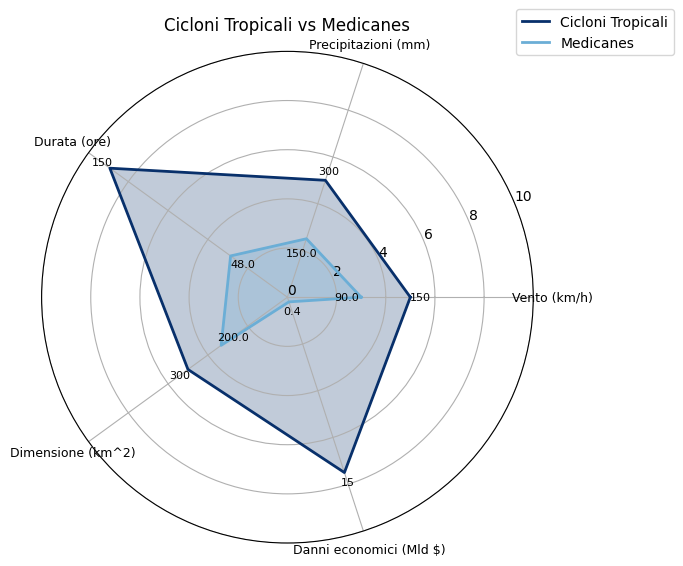

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/medicanes_cicloni.csv")

labels = df['Parametro'].tolist()
num_vars = len(labels)

cicloni_raw = df['Cicloni Tropicali'].tolist()
medicanes_raw = df['Medicanes'].tolist()
max_values = df['Max'].tolist()

def normalize_0_10(values, max_vals):
    return [min(10 * (v / max_v), 10) if max_v != 0 else 0 for v, max_v in zip(values, max_vals)]

cicloni = normalize_0_10(cicloni_raw, max_values)
medicanes = normalize_0_10(medicanes_raw, max_values)

cicloni += cicloni[:1]
medicanes += medicanes[:1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

ax.plot(angles, cicloni, color='#08306b', linewidth=2, label='Cicloni Tropicali')  
ax.fill(angles, cicloni, color='#08306b', alpha=0.25)

ax.plot(angles, medicanes, color='#6baed6', linewidth=2, label='Medicanes')  
ax.fill(angles, medicanes, color='#6baed6', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_yticklabels(['0', '2', '4', '6', '8', '10'])
ax.set_ylim(0, 10)

for i in range(num_vars):
    angle = angles[i]
    ax.text(angle, cicloni[i] + 0.4, f"{cicloni_raw[i]}", color='black', ha='center', va='center', fontsize=8)
    
    y_pos = medicanes[i] - 0.6
    if y_pos < 0.3:
        y_pos = medicanes[i] + 0.4
    ax.text(angle, y_pos, f"{medicanes_raw[i]}", color='black', ha='center', va='center', fontsize=8)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Cicloni Tropicali vs Medicanes', fontsize=12)
plt.tight_layout()
plt.show()


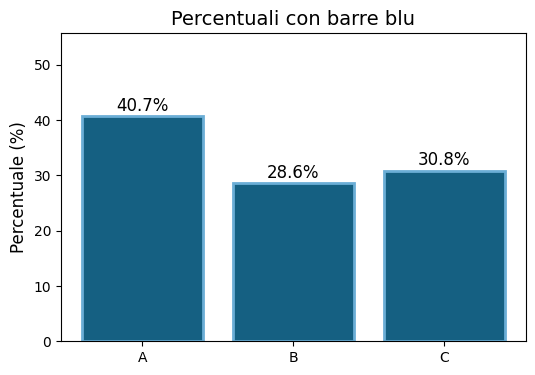

In [2]:
import matplotlib.pyplot as plt

# Dati
percentuali = [40.7, 28.6, 30.8]
etichette = ['A', 'B', 'C']

# Colori
fill_color = '#156082'      # blu pieno per le barre
edge_color = '#6baed6'      # blu chiaro per il contorno

plt.figure(figsize=(6,4))
bars = plt.bar(etichette, percentuali, color=fill_color, edgecolor=edge_color, linewidth=2)

# Etichette sopra le barre
for bar, val in zip(bars, percentuali):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val}%", ha='center', fontsize=12)

plt.ylabel('Percentuale (%)', fontsize=12)
plt.title('Percentuali con barre blu', fontsize=14)
plt.ylim(0, max(percentuali) + 15)
plt.show()
